In [10]:
#modify to 'python' as needed
!python3 -m pip install --upgrade pip


In [15]:
#modify to 'pip' as needed
!pip3 install torch torchvision numpy matplotlib scikit-learn seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.8/150.8 MB 6.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 12.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 13.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 11.4 MB/s eta 0:00:0000:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  NOTE: The current PATH contains path(s) starting with `~`, which may not be expanded by all applications.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  NOTE: The current PATH contains path(s) starting with `~`, which may not be expanded by all applications.


In [21]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader, random_split
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import confusion_matrix
import seaborn as sns
import os


In [36]:
# Set directory and transformations
data_dir = 'EuroSAT_RGB'  # Adjust path as needed
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load dataset and split
dataset = ImageFolder(root=data_dir, transform=transform)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])


Here we determine our batch size. I experimented with smaller and larger batch sizes. For larger batch sizes, my accuracy decreased which I simply measure by comparing actual values and predicted values. For 3 my accuracy was slightly worse so I decided to just stick with a batch size of 4. 

In [37]:
batch_size = 4
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


Here we define our convolutional neural network. We employ a simple network with 2 layers that can be used to handle images. 

In [38]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        # Define layers
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc1 = nn.Linear(8*8*32, 1000)
        self.fc2 = nn.Linear(1000, len(dataset.classes))

    def forward(self, x):
        # Define forward pass
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

model = ConvNet()


When defining, the number of epcohs, I started with 10. I then increased the number to 20 but saw that the accuracy suffered. So, I slightly increased it to 12. For the learning rate, I found 0.0001 to be the best since higher and lower learning rates decreased our accuracy.

In [39]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)
num_epochs = 12

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i + 1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')


Epoch [1/12], Step [100/5400], Loss: 1.9466
Epoch [1/12], Step [200/5400], Loss: 1.5269
Epoch [1/12], Step [300/5400], Loss: 1.6912
Epoch [1/12], Step [400/5400], Loss: 1.4230
Epoch [1/12], Step [500/5400], Loss: 0.8415
Epoch [1/12], Step [600/5400], Loss: 1.5954
Epoch [1/12], Step [700/5400], Loss: 1.8714
Epoch [1/12], Step [800/5400], Loss: 1.2480
Epoch [1/12], Step [900/5400], Loss: 2.3148
Epoch [1/12], Step [1000/5400], Loss: 1.2305
Epoch [1/12], Step [1100/5400], Loss: 1.2567
Epoch [1/12], Step [1200/5400], Loss: 0.5070
Epoch [1/12], Step [1300/5400], Loss: 2.0133
Epoch [1/12], Step [1400/5400], Loss: 1.5546
Epoch [1/12], Step [1500/5400], Loss: 1.0475
Epoch [1/12], Step [1600/5400], Loss: 1.6002
Epoch [1/12], Step [1700/5400], Loss: 1.5144
Epoch [1/12], Step [1800/5400], Loss: 1.2162
Epoch [1/12], Step [1900/5400], Loss: 2.0249
Epoch [1/12], Step [2000/5400], Loss: 0.5526
Epoch [1/12], Step [2100/5400], Loss: 1.0644
Epoch [1/12], Step [2200/5400], Loss: 1.5396
Epoch [1/12], Step 

Accuracy of the model on the test images: 82.55555555555556%


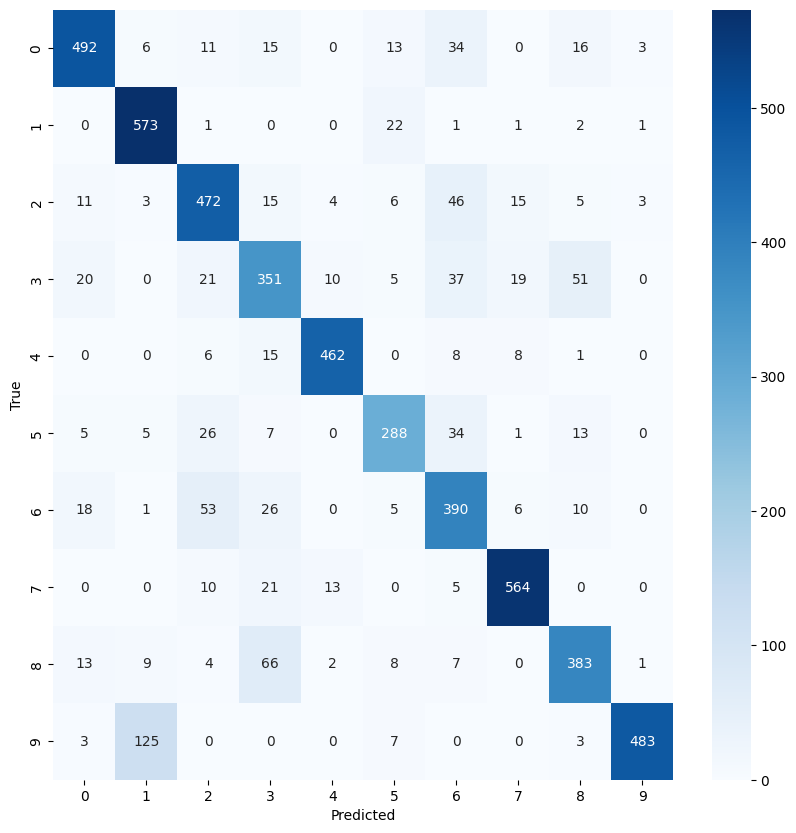

In [40]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    all_labels = []
    all_preds = []
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_labels.extend(labels)
        all_preds.extend(predicted)

# Print accuracy
accuracy = correct / total
print(f'Accuracy of the model on the test images: {100 * accuracy}%')

# Plot confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [41]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize the image
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


let's look at random images from our test set to se how our model performs.

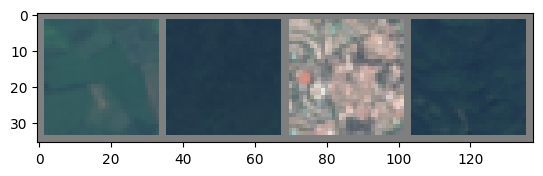

True labels: Pasture Forest Residential Forest
Predicted labels: Pasture Forest PermanentCrop Forest


In [42]:
dataiter = iter(test_loader)
images, labels = next(dataiter) 
imshow(torchvision.utils.make_grid(images))
print('True labels:', ' '.join(f'{dataset.classes[labels[j]]:5s}' for j in range(batch_size)))
print('Predicted labels:', ' '.join(f'{dataset.classes[all_preds[j]]:5s}' for j in range(batch_size)))
